# Imports

Begin by importing the required libraries.

In [24]:
! virtualenv venv
! powershell .\start.ps1

created virtual environment CPython3.10.6.final.0-64 in 1190ms
  creator CPython3Windows(dest=C:\Users\juinl\Documents\GitHub\Analysis-of-Algorithms\Dijkstra Shortest Path Search\venv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=C:\Users\juinl\AppData\Local\pypa\virtualenv)
    added seed packages: Pillow==9.2.0, contourpy==1.0.5, cycler==0.11.0, fonttools==4.37.4, kiwisolver==1.4.4, matplotlib==3.6.1, numpy==1.23.3, packaging==21.3, pandas==1.5.0, pip==22.2.2, pyparsing==3.0.9, python_dateutil==2.8.2, pytz==2022.4, seaborn==0.12.0, setuptools==65.3.0, six==1.16.0, wheel==0.37.1
  activators BashActivator,BatchActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [25]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

Import the generated dataset.

In [26]:
A = pd.read_csv("./datasets/PartA.csv", header=0)
B = pd.read_csv("./datasets/PartB.csv", header=0)

# Defining Parameters

In our empirical analysis on Dijkstra's Shortest Path Search Algorithm, the following defines the parameters used:
* Graph type: *G(V, E)* where *G* is a **directed graph** which ranges from **sparsely connected** to **strongly connected**.
* Number of vertices, *V* ranges from **100 to 2500**.
* Total number of edges, *E* ranges from (2 to *V*, in multiples of 2) * *V*.
* Each vertex will have 1 to *V* edges. The number of edges each vertex has is consistent, i.e. a graph where a vertex has 5 edges guarantees that all other vertex has 5 edges.



# Part A

We plot the number of key comparisons against number of vertices, for Shortest Path Search Algorithm applied on adjacency matrix and using array-based priority queue.

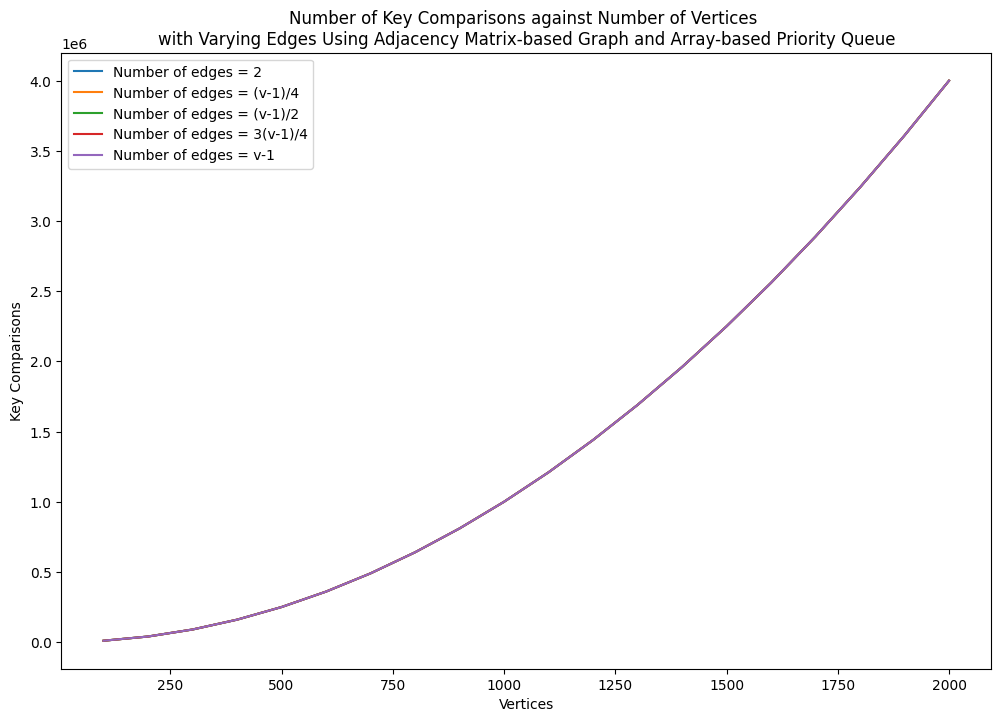

In [27]:
verticesMegaList = [[],[],[],[],[]]
keyCompMegaList = [[],[],[],[],[]]

count = 0
for index, row in A.iterrows():
    keyCompMegaList[count].append(int(row["Key Comparisons"]))
    verticesMegaList[count].append(int(row["Vertices"]))
    count += 1
    if count == 5:
        count = 0

plt.figure(figsize=(12, 8))
edgeList = ["2", "(v-1)/4", "(v-1)/2", "3(v-1)/4", "v-1"]
for i in range(len(keyCompMegaList)):
    df = pd.DataFrame()
    df["Vertices"] = verticesMegaList[i]
    df["Key Comparisons"] = keyCompMegaList[i]

    plot = sb.lineplot(data= df, 
                        x="Vertices", 
                        y="Key Comparisons", 
                        label="Number of edges = %s" %edgeList[i])
    
    plot.set(title="Number of Key Comparisons against Number of Vertices \nwith Varying Edges Using Adjacency Matrix-based Graph and Array-based Priority Queue")



We plot the elapsed time against number of vertices, for Shortest Path Search Algorithm applied on adjacency matrix and using array-based priority queue.

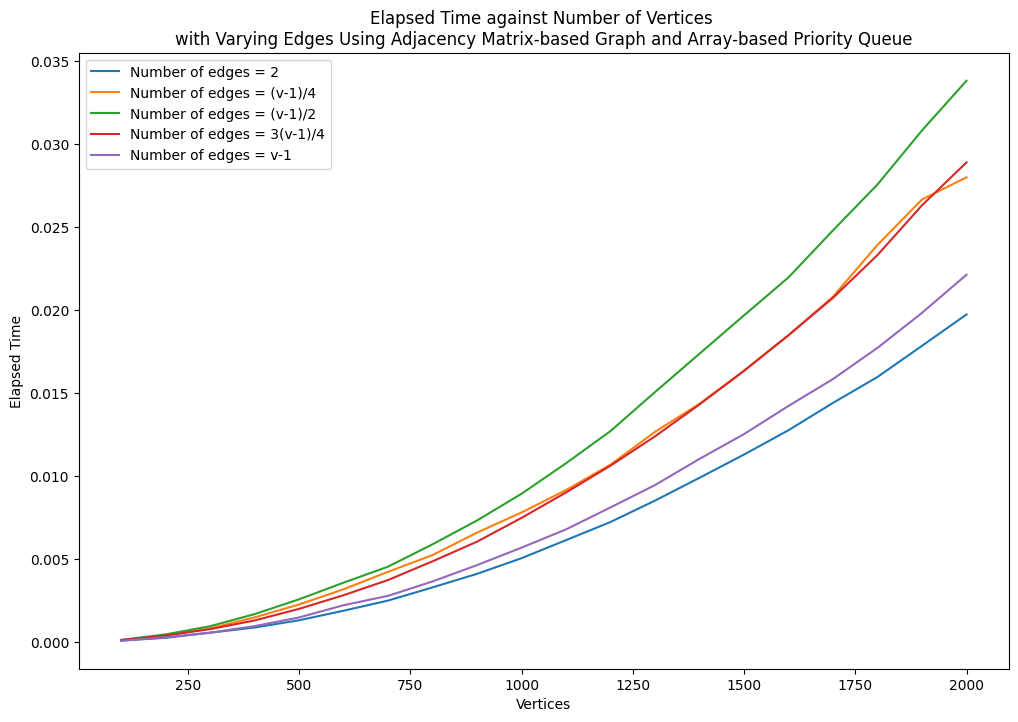

In [28]:
timeMegaList = [[],[],[],[],[]]

count = 0
for index, row in A.iterrows():
    timeMegaList[count].append(float(row["Elapsed Time"]))
    count += 1
    if count == 5:
        count = 0

plt.figure(figsize=(12, 8))
edgeList = ["2", "(v-1)/4", "(v-1)/2", "3(v-1)/4", "v-1"]
for i in range(len(timeMegaList)):
    df = pd.DataFrame()
    df["Vertices"] = verticesMegaList[i]
    df["Elapsed Time"] = timeMegaList[i]

    plot = sb.lineplot(data= df, 
                        x="Vertices", 
                        y="Elapsed Time", 
                        label="Number of edges = %s" %edgeList[i])
    
    plot.set(title="Elapsed Time against Number of Vertices \nwith Varying Edges Using Adjacency Matrix-based Graph and Array-based Priority Queue")



### Theoretical Analysis

We expect the Dijkstra's Shortes Path Search algorithm to have a time complexity of ***O(|V|<sup>2</sup>)***.

**Derivations:**
* Since we are working with **directed** and **connected** graph, we guarantee to visit all nodes. This incurs a search cost of ***O(|V|)***.
* On each iteration, we expand the vertex with smallest distance from start vertex. We find this vertex by traversing through the `dist[]` array and find the minimum. This incurs a search cost of ***O(|V|)***.
* On each iteration, we check if the other vertices are connected to it. This incurs a search cost of ***O(|V| - 1)***.

Thus, the time complexity of DIjkstra's Shortest Path Search algorithm has a time complexity of ***O(|V|)*** x (***O(|V|)*** + ***O(|V| - 1)***) = ***O(|V|<sup>2</sup>)***.



**Note on Key Comparisons:**
* The number of key comparisons for a graph with size *|V|* vertices has the same number of key comparisons regardless of how many egdes each vertex has. This is because a comparison is done to determine if the vertex is connected or not, and so we have to check for *|V| - 1* vertices for every vertex.

* Thus, to truly see the effect of number of edges on the complexity of Dijkstra's algorithm, it is much more appropriate to look at elapsed time as it takes into account the time to compare distance and update distance. (More connected edges means more comparing and updating is done)


**Note on Edges:**
* The number of edges each vertex has affects the constant coefficient of the time complexity of the algorithm. 

However, we notice that the graph with each vertex having *(|V| - 1) / 2* edges gives the higher constant coefficient instead of the fully connected graph. 

We shall explain with the aid of the following code snippet: <br/>
<img src="./media/DijkstraArray.png" />
* The maximum edge size is set to 10 and we allow edge with weight 0 on our graphs. The more edges a vertex has, the higher the probability that the vertex has more randomly generated edges with weight 0. Statistically, when we visit more and more vertices, it is most likely that we have already found the shortest path, and so the `if-branch` is not taken.

* On the other hand, the lesser edges a vertex has, the more likely the condition `g->adjMatrix[target][i] != -1` returns `False`, and so the `if-branch` is also not taken.

* It turns out that the turning point is somewhere in the middle between minimum edges and maximum edges, where a vertex having *(|V| - 1) / 2* edges will have the highest number of `if-branch` is taken situation, leading to highest elapsed time.

### Verify the analyzed complexity

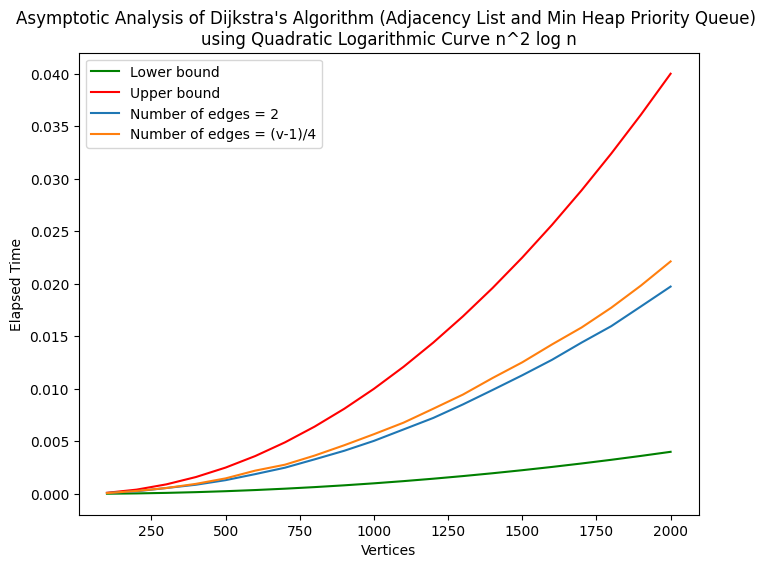

In [63]:
timeMegaList = [[],[]]
verticesMegaList = [[],[]]

count = 0
for index, row in A.iterrows():
    if count == 0:
        verticesMegaList[0].append(int(row["Vertices"]))
        timeMegaList[0].append(float(row["Elapsed Time"]))
    if count == 4:
        verticesMegaList[1].append(int(row["Vertices"]))
        timeMegaList[1].append(float(row["Elapsed Time"]))
        
    count += 1
    if count == 5:
        count = 0

plt.figure(figsize=(8,6))
x = np.linspace(100, 2000, 20)
y1 = 0.000000001 * (x ** 2)
y2 = 10 * y1
plt.plot(x, y1, 'g', label="Lower bound")
plt.plot(x, y2, 'r', label="Upper bound")

edgeList[2] = ["2", "|V| - 1"]
for i in range(len(timeMegaList)):
    df = pd.DataFrame()

    df["Vertices"] = verticesMegaList[i]
    df["Elapsed Time"] = timeMegaList[i]
    plot = sb.lineplot(data= df, 
                        x="Vertices", 
                        y="Elapsed Time", 
                        label="Number of edges = %s" %edgeList[i])

plot.set(title="Asymptotic Analysis of Dijkstra's Algorithm (Adjacency Matrix and Array-based Priority Queue) \nusing Quadratic Curve n^2")
plt.show()

# Part B

We plot the number of key comparisons against number of vertices, for Shortest Path Search Algorithm applied on adjacency list and using min heap priority queue.

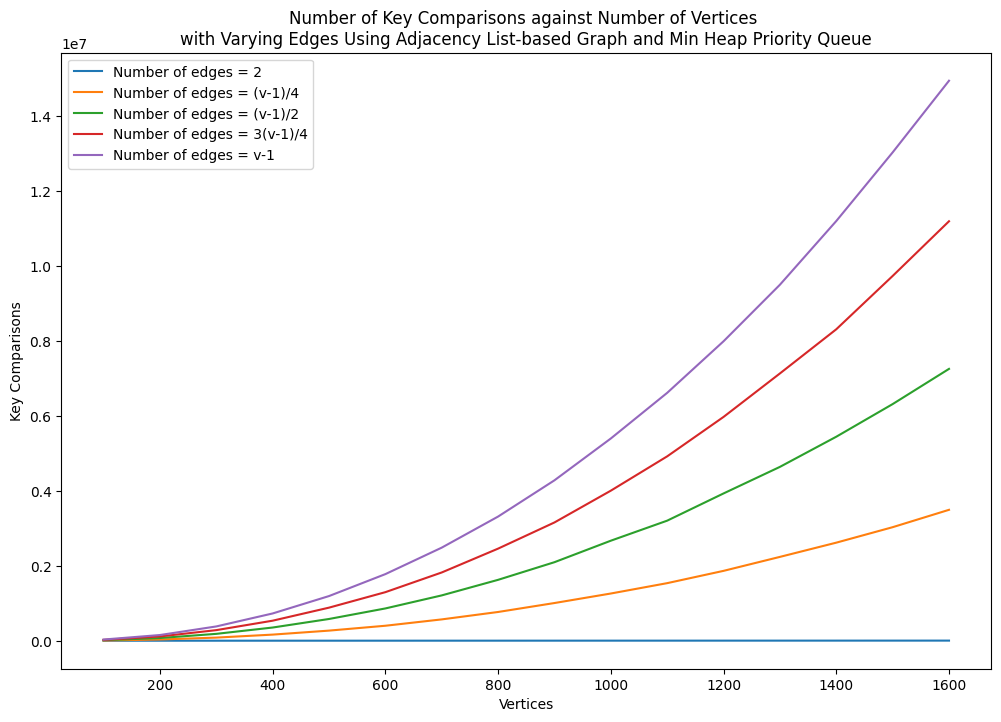

In [29]:
verticesMegaList = [[],[],[],[],[]]
keyCompMegaList = [[],[],[],[],[]]

count = 0
for index, row in B.iterrows():
    keyCompMegaList[count].append(int(row["Key Comparisons"]))
    verticesMegaList[count].append(int(row["Vertices"]))
    count += 1
    if count == 5:
        count = 0

plt.figure(figsize=(12, 8))
edgeList = ["2", "(v-1)/4", "(v-1)/2", "3(v-1)/4", "v-1"]
for i in range(len(keyCompMegaList)):
    df = pd.DataFrame()
    df["Vertices"] = verticesMegaList[i]
    df["Key Comparisons"] = keyCompMegaList[i]

    plot = sb.lineplot(data= df, 
                        x="Vertices", 
                        y="Key Comparisons", 
                        label="Number of edges = %s" %edgeList[i])
    
    plot.set(title="Number of Key Comparisons against Number of Vertices \nwith Varying Edges Using Adjacency List-based Graph and Min Heap Priority Queue")

We plot the elapsed time against number of vertices, for Shortest Path Search Algorithm applied on adjacency list and using min heap priority queue.

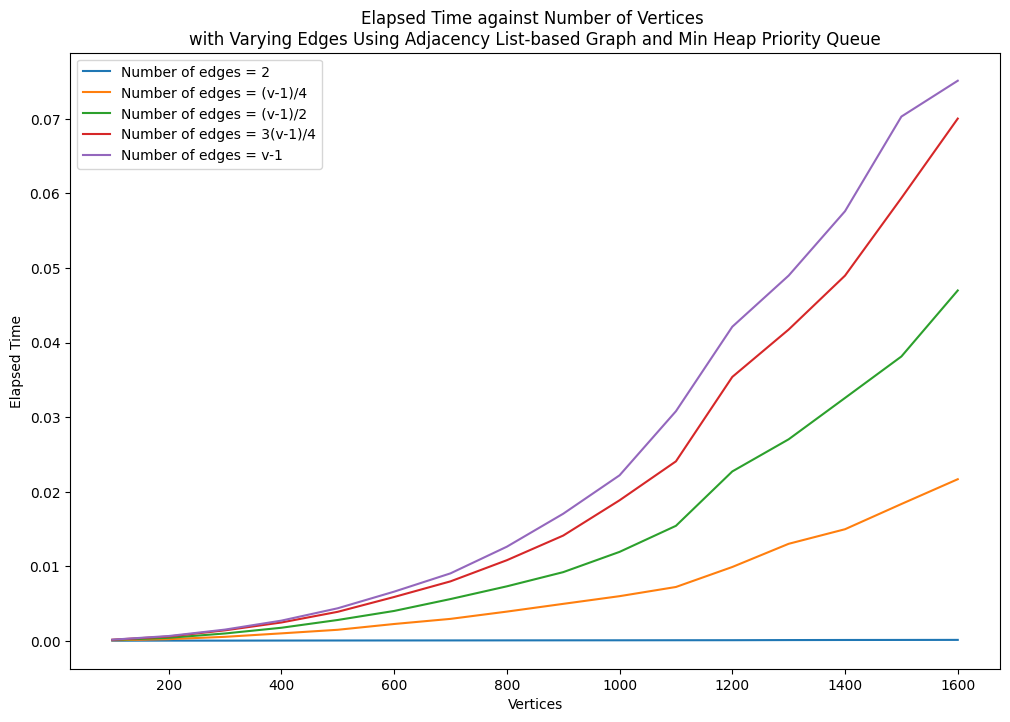

In [30]:
timeMegaList = [[],[],[],[],[]]

count = 0
for index, row in B.iterrows():
    timeMegaList[count].append(float(row["Elapsed Time"]))
    count += 1
    if count == 5:
        count = 0

plt.figure(figsize=(12, 8))
edgeList = ["2", "(v-1)/4", "(v-1)/2", "3(v-1)/4", "v-1"]
for i in range(len(timeMegaList)):
    df = pd.DataFrame()
    df["Vertices"] = verticesMegaList[i]
    df["Elapsed Time"] = timeMegaList[i]

    plot = sb.lineplot(data= df, 
                        x="Vertices", 
                        y="Elapsed Time", 
                        label="Number of edges = %s" %edgeList[i])
    
    plot.set(title="Elapsed Time against Number of Vertices \nwith Varying Edges Using Adjacency List-based Graph and Min Heap Priority Queue")



### Theoretical Analysis

We expect Dijkstra's Shortest Path Search algorithm using adjacency list and min heap priority queue to have a time complexity of ***O(|E| log |V|)***.

**Derivations:**
* Since we are working with connected and directed graph, we are guaranteed to be able to traverse to all vertices regardless of where we begin. This incurs a search cost of ***O(|V|)*** to visit all vertices.

* On each visit, we only visit those vertices which are connected to the current vertex. By our defined parameters, we know that each vertex has exactly *|E|*/*|V|* edges. When we push each connected vertex to the priority queue, we are doing recursive swaps within the min heap until the vertex reaches the correct position. This incurs a cost of ***O(log |V|)***.

* When we dequeue from the priority queue, we call heapify to transform the heap without root into a new heap. This incurs another cost of ***O(log |V|)***.

Thus, the total time complexity of Dijkstra's algorithm using adjacency list and min heap as priority queue is: <br/>
<img src="./media/PartBDerivation1.png" /> <br/>
<img src="./media/PartBDerivation2.png" /> <br/>
<img src="./media/PartBDerivation3.png" /> <br/>


**Note on edges:**
Unlike using adjacency matrix and array-based priority queue, the number of edges a vertex has directly affects the time complexity of Dijkstra's algorithm in adjacency list form using min heap priority queue.

* For **sparsely connected graph**, ***O(|E| + |V|)*** = ***O(|E|)*** and so the time complexity can be simplified to ***O(|E| log |V|)***.

* For **densely connected graph**, *|E|* approaches *|V|<sup>2</sup> - |V|*, i.e. ***O(|E| + |V|)*** = ***O(|V|<sup>2</sup> - |V| + |V|)*** = ***O(|V|<sup>2</sup>)*** and so the time complexity is therefore ***O(|V|<sup>2</sup> log |V|)***.


<u> Proof that pushing vertex into priority queue incurs a time complexity of ***O(log |V|)*** </u>

We consider a densely connected graph such that each vertex, *v* has exactly *|V|* - 1 edges. We call such graphs strongly connected.

On each iteration, we will push *|V|* - 2 vertices (since we exclude vertex connect to itself) into the priority queue and extract 1 vertex from the queue.

Alternately, we can write the maximum number of vertices in the priority queue in a summation series:
<img src="./media/PartBDerivation4.png"/> <br/>
where *i* is the number of visited vertices.

Since the maximum number of vertices in a priority queue is at most ***O(|V|<sup>2</sup>)***, the time complexity of pushing a vertex into a priority queue is therefore ***O(log |V|<sup>2</sup>)*** = ***O(2 log |V|)*** = ***O(log |V|)***.

#### Verify the analysed complexity

Verify for **densely connected** graph:

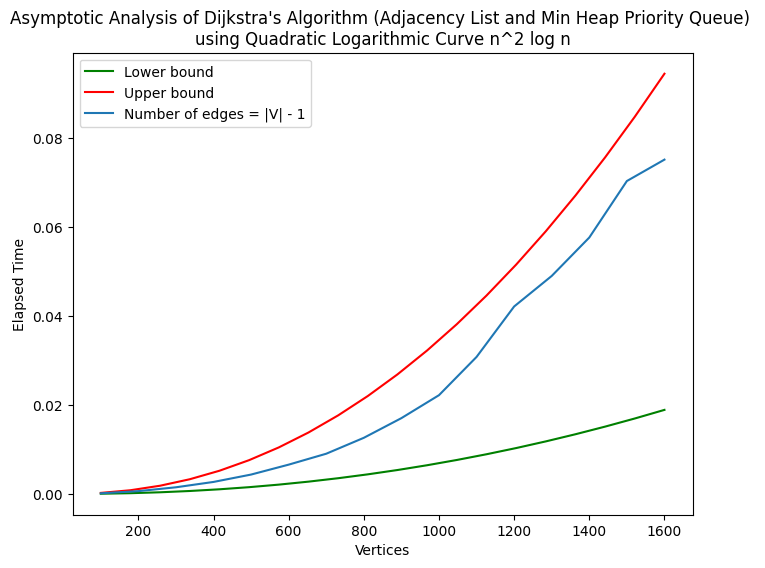

In [59]:
timeMegaList = [[],[]]
verticesMegaList = [[],[]]

count = 0
for index, row in B.iterrows():
    if count == 0:
        verticesMegaList[0].append(int(row["Vertices"]))
        timeMegaList[0].append(float(row["Elapsed Time"]))
    if count == 4:
        verticesMegaList[1].append(int(row["Vertices"]))
        timeMegaList[1].append(float(row["Elapsed Time"]))
        
    count += 1
    if count == 5:
        count = 0

plt.figure(figsize=(8,6))
x = np.linspace(100, 1600, 20)
y1 = 0.000000001 * (x ** 2) * np.log(x)
y2 = 5 * y1
plt.plot(x, y1, 'g', label="Lower bound")
plt.plot(x, y2, 'r', label="Upper bound")

edgeList[2] = ["2", "|V| - 1"]
df = pd.DataFrame()

df["Vertices"] = verticesMegaList[1]
df["Elapsed Time"] = timeMegaList[1]
plot = sb.lineplot(data= df, 
                    x="Vertices", 
                    y="Elapsed Time", 
                    label="Number of edges = |V| - 1")

plot.set(title="Asymptotic Analysis of Dijkstra's Algorithm (Adjacency List and Min Heap Priority Queue) \nusing Quadratic Logarithmic Curve n^2 log n")
plt.show()

Verify for **sparsely connected graph**:

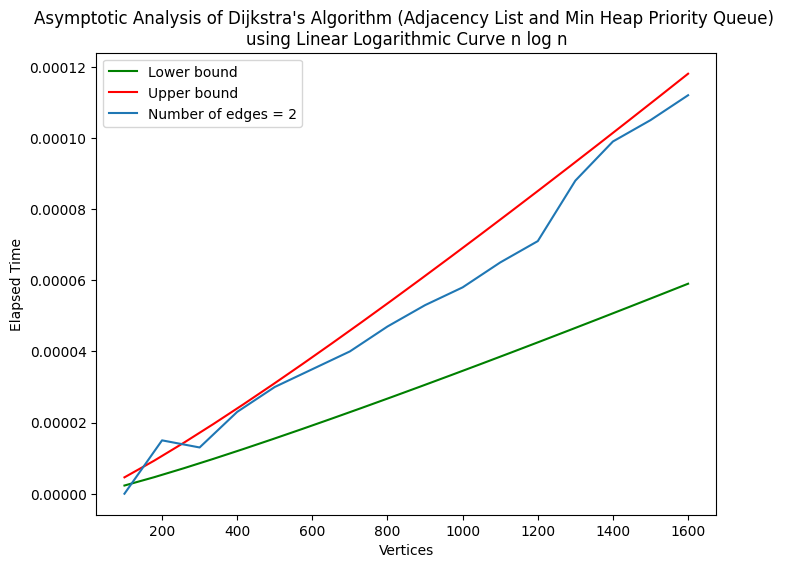

In [60]:
plt.figure(figsize=(8,6))
x = np.linspace(100, 1600, 20)
y1 = 0.000000005 * (x) * np.log(x)
y2 = 2 * y1
plt.plot(x, y1, 'g', label="Lower bound")
plt.plot(x, y2, 'r', label="Upper bound")

edgeList[2] = ["2", "|V| - 1"]
df = pd.DataFrame()

df["Vertices"] = verticesMegaList[0]
df["Elapsed Time"] = timeMegaList[0]
plot = sb.lineplot(data= df, 
                    x="Vertices", 
                    y="Elapsed Time", 
                    label="Number of edges = 2")

plot.set(title="Asymptotic Analysis of Dijkstra's Algorithm (Adjacency List and Min Heap Priority Queue) \nusing Linear Logarithmic Curve n log n")
plt.show()